# **🌟 Billionaires Dataset Insights 🌟**

## **💫 Age Insights**
1. Most billionaires fall within the age group 64-65.9 (count=189).
2. The youngest billionaire is 18 years old, and the oldest is 101 years old.
3. 89% of billionaires are at least 50 years old.

## **🌍 Country Insights**
1. The United States has the highest number of billionaires, followed by China and India.
2. 48.37% of billionaires reside in the US or China.
3. 53.48% of billionaires who migrated from their country of citizenship moved to the UK, Switzerland, US, or China (out of 36 countries).

## **🏢 Industry Insights**
1. The Finance & Investment Industry has the most billionaires.
2. The fewest billionaires work in gambling and casinos.
3. On average, billionaires in the automotive industry have the highest net worth (7195.89) compared to the construction & engineering industry (2633.33).

## **🚀 Self-Made Insights**
1. 68.6% of billionaires are self-made.
2. 100% of billionaires from Russia and 96.74% from China are self-made, compared to 71.6% from the United States.

## **👫 Gender Insights**
1. 87.2% of billionaires are men.
2. The mean net worth of women is lower than that of men, but there is no statistically significant difference.
3. The most popular industry among women billionaires is Food & Beverage, whereas for men, it is Finance & Investments.
4. Self-made percentage for women is 28.48%, and for men, it is 74.51%.

## **💰 Net Worth Insights**
1. 93.11% of billionaires have a net worth less than 10,000.
2. Approximately 93.11% of billionaires have a net worth less than 10,000.

🌈 These insights offer a dazzling overview of the distribution of billionaires across various demographics, industries, and wealth categories. 🚀✨


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/billionaires-statistics-dataset/Billionaires Statistics Dataset.csv


In [ ]:
# Importing necessary libraries
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Exploring the directory structure
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Loading the dataset
data = pd.read_csv('/kaggle/input/billionaires-statistics-dataset/Billionaires Statistics Dataset.csv')


/kaggle/input/billionaires-statistics-dataset/Billionaires Statistics Dataset.csv


In [ ]:
# Basic exploration of the dataset
data.info()
data.describe()

# Handling missing values
data.isnull().sum()

# Dropping unnecessary columns
data = data.drop(columns=['organization', 'title', 'state', 'residenceStateRegion'])

# Further handling missing values after dropping columns
data.isnull().sum()

# Dropping additional columns
data = data.drop(columns=['cpi_country', 'cpi_change_country', 'life_expectancy_country', 'tax_revenue_country_country',
                          'latitude_country', 'longitude_country', 'city', 'date', 'birthDate', 'birthYear', 'birthMonth', 'birthDay'])

# Handling missing values in the 'country' column
data['country'].fillna('Unknown', inplace=True)
data.isnull().sum()

# Checking data types and fixing 'gdp_country' data type
data.dtypes
data['gdp_country'] = data['gdp_country'].str.replace('$', '')
data['gdp_country'] = data['gdp_country'].str.replace(',', '')
data['gdp_country'] = pd.to_numeric(data['gdp_country'])

# Checking skewness of specific columns
print(data['gross_primary_education_enrollment_country'].skew(), data['population_country'].skew(), sep='\n')

# Handling missing values using SimpleImputer
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
data[['age', 'gdp_country', 'gross_tertiary_education_enrollment', 'total_tax_rate_country']] = mean_imputer.fit_transform(data[['age', 'gdp_country', 'gross_tertiary_education_enrollment', 'total_tax_rate_country']])
median_imputer = SimpleImputer(strategy='median')
data[['gross_primary_education_enrollment_country', 'population_country']] = median_imputer.fit_transform(data[['gross_primary_education_enrollment_country', 'population_country']])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [ ]:
# Checking for remaining missing values
data.isnull().sum()

rank                                          0
finalWorth                                    0
category                                      0
personName                                    0
age                                           0
country                                       0
source                                        0
industries                                    0
countryOfCitizenship                          0
selfMade                                      0
status                                        0
gender                                        0
lastName                                      0
firstName                                     3
gdp_country                                   0
gross_tertiary_education_enrollment           0
gross_primary_education_enrollment_country    0
total_tax_rate_country                        0
population_country                            0
dtype: int64

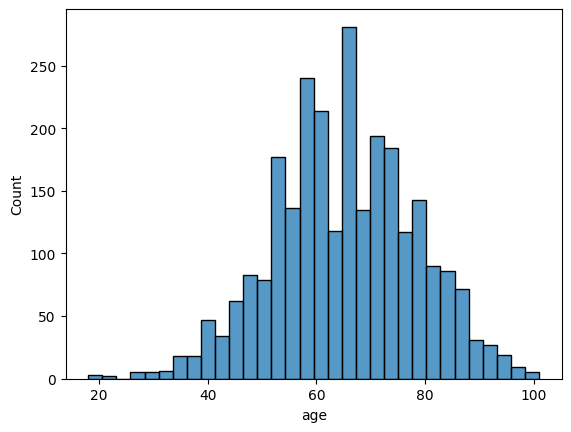

In [ ]:
# Visualizing age distribution
import seaborn as sns
sns.histplot(data, x='age')

# Visualizing age distribution using Plotly
import plotly.express as px
fig = px.histogram(data, x="age")
fig.show()

# Age Insights
# 1. Most number of billionaires belong to the age group 64-65.9 (count=189).
# 2. The youngest billionaire is 18 years old and the oldest is 101 years old.
# 3. 89% of billionaires are at least 50 years old

In [ ]:
# Country Insights
# 1. The United States has the most number of billionaires followed by China and then India.
# 2. 48.37% of billionaires reside in the US or China.
# 3. Out of the billionaires who migrated from their country of citizenship, 53.48% moved to either the UK, Switzerland, US, or China (out of total 36 countries)

In [ ]:
# Grouping and visualizing country data
country_size = data.groupby('country', as_index=False).size().sort_values('size', ascending=False)
country_size.size = round((country_size['size'] / country_size['size'].sum()) * 100, 2)

In [ ]:
# US and China combined share
country_size.head(2)['size'].sum()

48.37

In [ ]:
# Creating a new column 'label' to categorize countries
keep_countries = ['United States', 'China', 'India']
country_size['label'] = country_size['country'].where(country_size['country'].isin(keep_countries), 'Others')

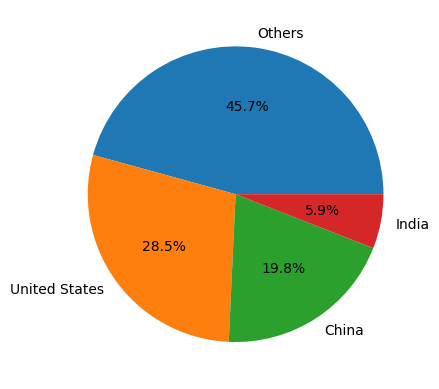

In [ ]:
# Pie chart of country distribution
country_grouped = country_size.groupby(country_size['label'], as_index=False)['size'].sum().sort_values('size', ascending=False)
import matplotlib.pyplot as plt
plt.pie(country_grouped["size"], labels=country_grouped["label"], autopct='%1.1f%%')
plt.show()

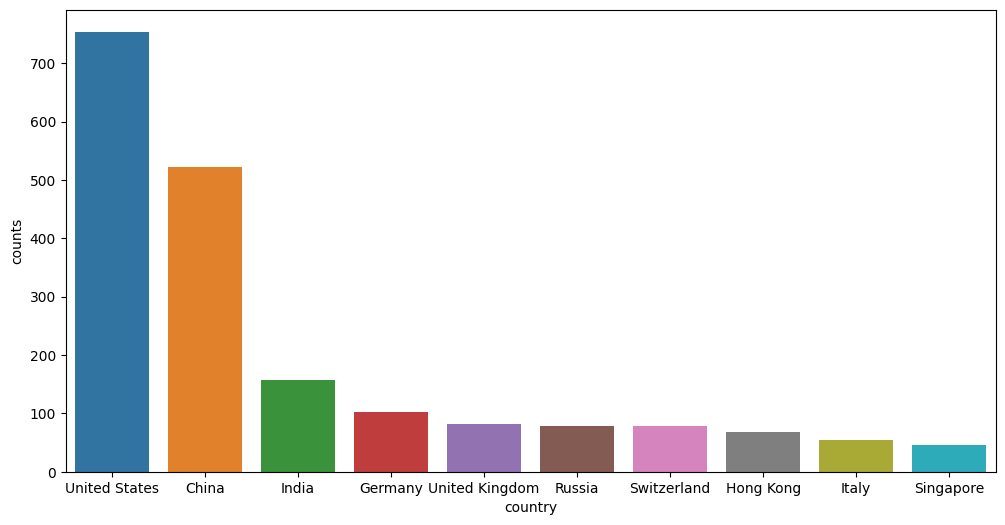

In [ ]:
# Bar chart of top 10 countries with the most billionaires
country_data = data.groupby('country').size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(country_data, x='country', y='counts')
plt.show()

<Axes: xlabel='countryOfCitizenship', ylabel='counts'>

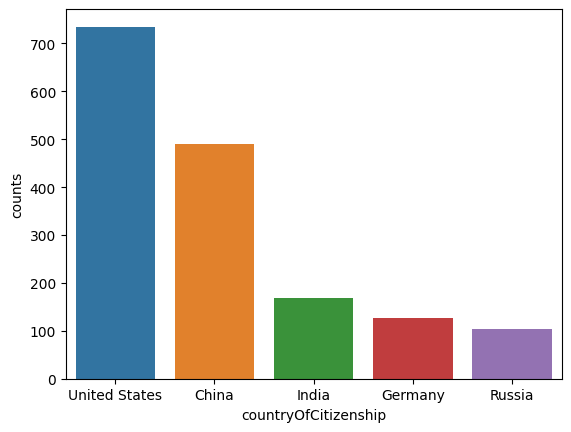

In [ ]:
# Bar chart of top 5 countries with the most billionaires by citizenship
country_data = data.groupby('countryOfCitizenship').size().reset_index(name='counts').sort_values('counts', ascending=False).head(5)
sns.barplot(country_data, x='countryOfCitizenship', y='counts')

In [ ]:
# Analyzing migration data
migration = data[data['country'] != data['countryOfCitizenship']]
migration_from = migration.groupby('countryOfCitizenship').size().reset_index(name='counts').sort_values('counts', ascending=False)

In [ ]:
# Percentage of migration
migration_perc = (migration_from['counts'].sum() / migration.shape[0]) * 100
print(round(migration_perc, 2))

100.0


In [ ]:
# Industry Insights
# 1. The Finance & Investment Industry has the most number of billionaires.
# 2. The fewest billionaires work in gambling and casinos.
# 3. On average, a billionaire working in the automotive industry has the highest net worth (7195.89) compared to the construction & engineering industry (2633.33).

# Grouping and visualizing industry data
bills_industry = data.groupby('industries', as_index=False).size().sort_values(by='size', ascending=False)

<Axes: xlabel='industries', ylabel='size'>

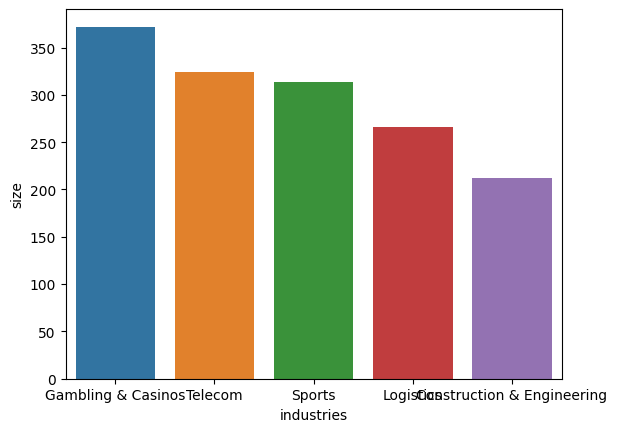

In [ ]:
# Bar chart of top 5 industries with the most billionaires
top5_bills = data.groupby('industries', as_index=False).size().sort_values(by='size', ascending=False).head(5)
bottom5_bills = data.groupby('industries', as_index=False).size().sort_values(by='size', ascending=True).head(5)
sns.barplot(top5_bills, x='industries', y='size')
sns.barplot(bottom5_bills, x='industries', y='size')

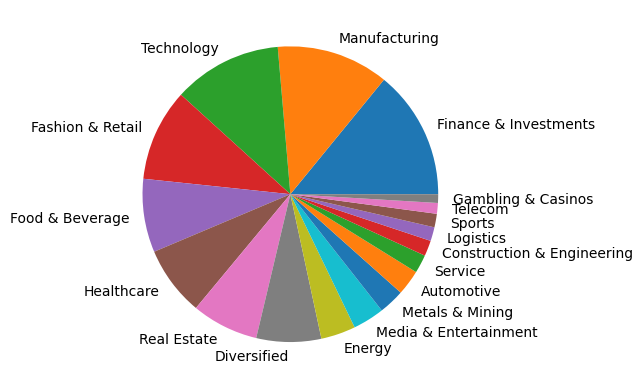

In [ ]:
# Pie chart of industry distribution
import matplotlib.pyplot as plt
plt.pie(bills_industry["size"], labels=bills_industry['industries'])
plt.show()

In [ ]:
# Mean net worth by industry
data[['industries', 'finalWorth']].groupby('industries', as_index=False).mean().sort_values('finalWorth', ascending=False)

,industries,finalWorth
0,Automotive,7195.890411
17,Telecom,6564.516129
4,Fashion & Retail,6386.466165
12,Metals & Mining,6037.837838
9,Logistics,5987.500000
16,Technology,5980.573248
2,Diversified,4840.641711
7,Gambling & Casinos,4820.000000
11,Media & Entertainment,4697.802198
3,Energy,4535.000000


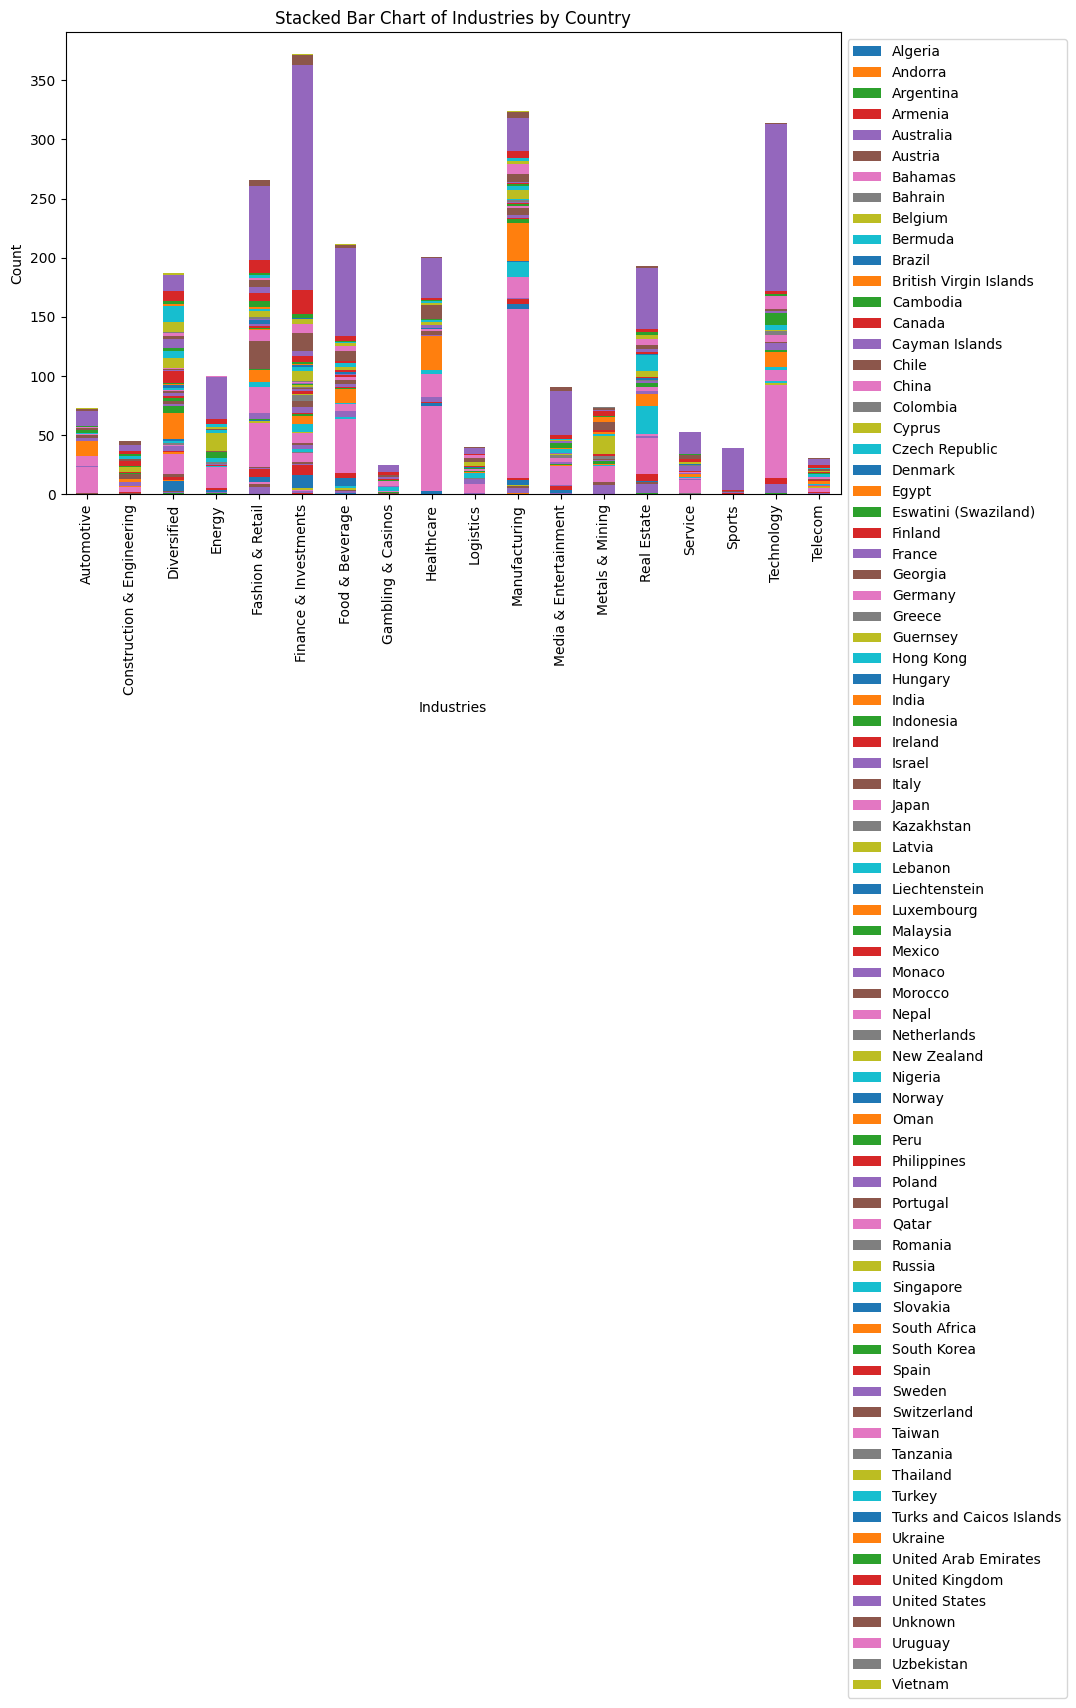

In [ ]:
grouped = data[['industries', 'country']].groupby(['industries', 'country']).size().unstack(fill_value=0)
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel("Industries")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Industries by Country")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # This moves the legend to the right of the figure
plt.show()


In [ ]:
# Grouping and visualizing self-made data
self_made = data.groupby('selfMade', as_index=False).size()
self_made['selfMade'].replace(False, 'Not Self Made', inplace=True)
self_made['selfMade'].replace(True, 'Self Made', inplace=True)

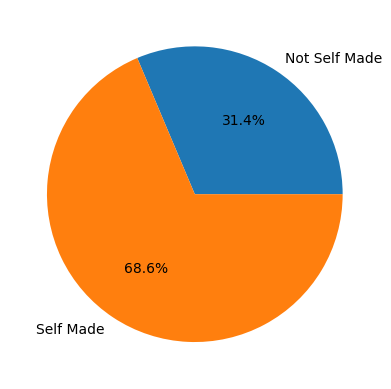

In [ ]:
# Pie chart of self-made distribution
import matplotlib.pyplot as plt
plt.pie(self_made["size"], labels=self_made['selfMade'], autopct='%1.1f%%')
plt.show()

In [ ]:
# Self-made vs. Inherited net worth comparison
data[['selfMade', 'finalWorth']].groupby('selfMade').mean()

,finalWorth
selfMade,
False,4970.410628
True,4465.397351


selfMade,False,True
country,,
China,17,506
Russia,0,79
United States,214,540


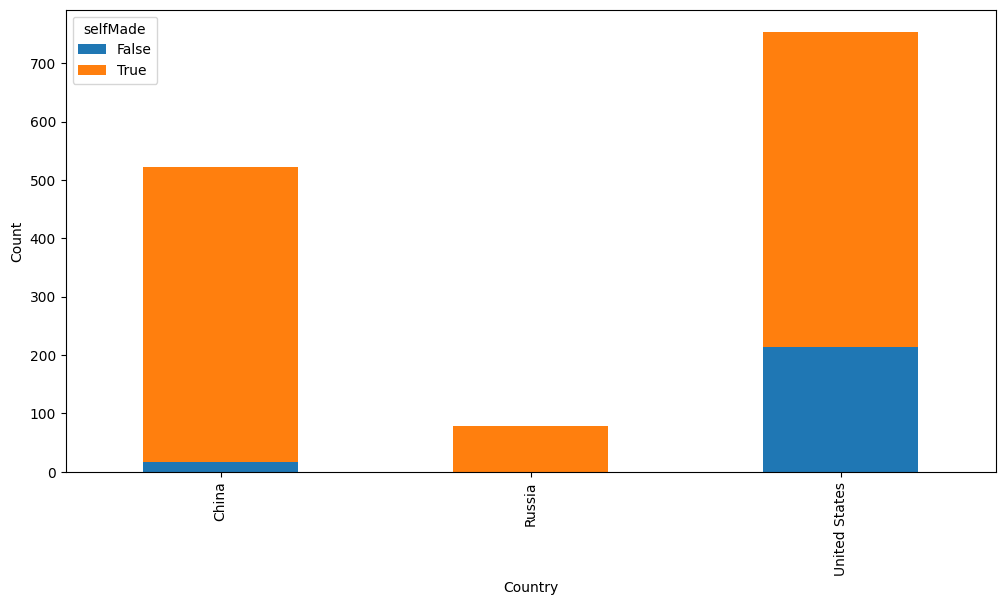

In [ ]:
# Self-made distribution by country
country_self_made = data[(data['country'] == 'China') | (data['country'] == 'Russia') | (data['country'] == 'United States')][['selfMade', 'country']].groupby(['country', 'selfMade']).size().unstack(fill_value=0)
plot = country_self_made.plot(kind='bar', stacked='True', figsize=(12, 6))
plt.xlabel("Country")
plt.ylabel("Count")
country_self_made

In [ ]:
# Gender Insights
# 1. 87.2% of billionaires are men.
# 2. The mean net worth of women is lower than that of men, but there is no statistically significant difference.
# 3. The most popular industry among women billionaires is Food & Beverage, whereas for men billionaires, it is Finance & Investments.
# 4. Self-made percentage for women is 28.48%, and for men, it is 74.51%.

<Axes: ylabel='count'>

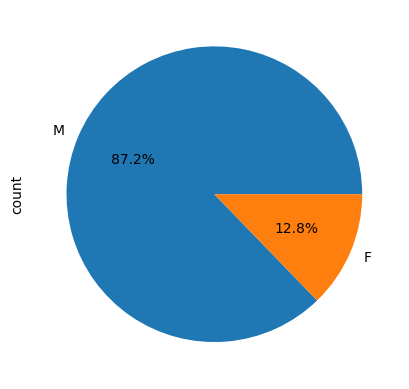

In [ ]:
# Visualizing gender distribution
data['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
# Mean net worth by gender
data.groupby('gender', as_index=False)['finalWorth'].mean()

,gender,finalWorth
0,F,4570.326409
1,M,4631.610942


In [ ]:
# Hypothesis Testing
# Is there a significant difference between the net worth of male and female billionaires?
# Ho = No difference in net worth
# H1 = Difference in net worth

female_fw = data[data['gender'] == 'F']['finalWorth']
male_fw = data[data['gender'] == 'M']['finalWorth']
import scipy.stats as stats
t_statistic, p_value = stats.ttest_ind(male_fw, female_fw)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# As the T value is small and the P value is far greater than 0.05, the conclusion is that there is no statistically significant difference in the final worth of men and women.

T-statistic: 0.10682886908089109
P-value: 0.9149328674378735


<Axes: xlabel='industries', ylabel='size'>

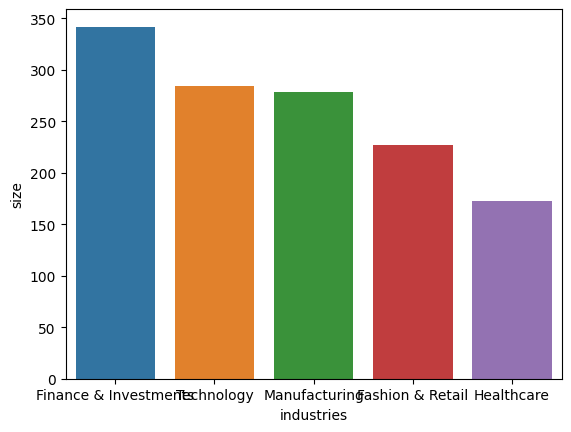

In [ ]:
# Top 5 industries with the most male billionaires

ind_m=data[data.gender=='M'].groupby('industries',as_index=False).size().sort_values('size',ascending=False)
ind_m['pct']=(ind_m['size']/ind_m['size'].sum())*100
sns.barplot(ind_m.head(5),x='industries',y='size')

<Axes: xlabel='industries', ylabel='size'>

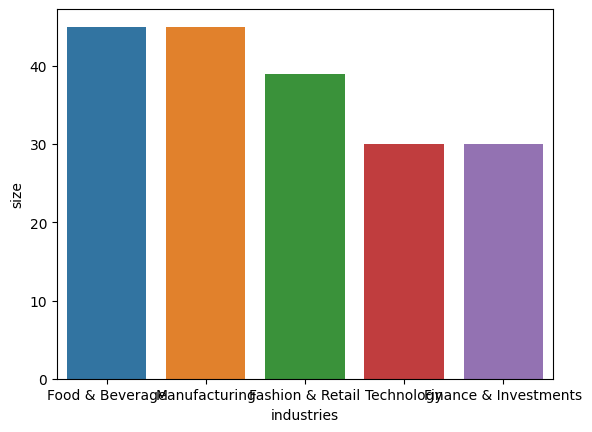

In [ ]:
# Top 5 industries with the most female billionaires
ind_f=data[data.gender=='F'].groupby('industries',as_index=False).size().sort_values('size',ascending=False)
ind_f['pct']=(ind_f['size']/ind_f['size'].sum())*100
sns.barplot(ind_f.head(5),x='industries',y='size')

In [ ]:
# Grouping the dataset by gender and self-made status and calculating the count of billionaires in each category
df_g_sf=data.groupby(['gender','selfMade'],as_index=False).size()

<Axes: xlabel='gender', ylabel='size'>

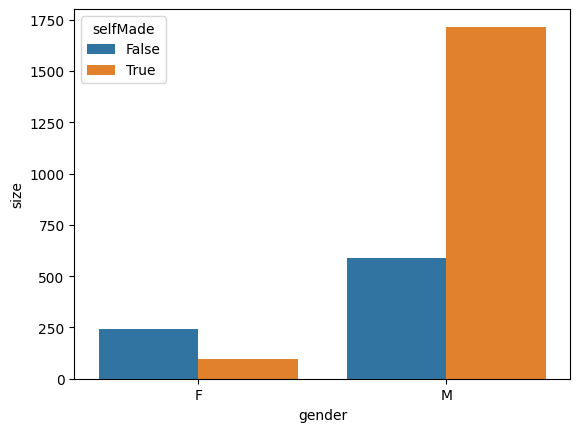

In [ ]:
sns.barplot(df_g_sf,x='gender',y='size',hue='selfMade')

<Axes: xlabel='finalWorth', ylabel='Count'>

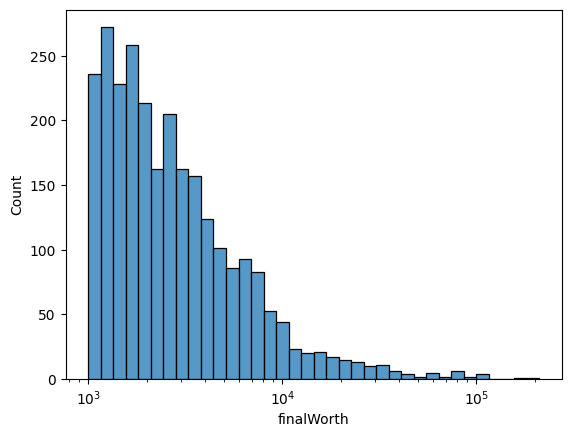

In [ ]:
# Net Worth Insights
# 1. 93.11% of billionaires have a net worth less than 10,000.
sns.histplot(data, x='finalWorth', log_scale=True)

In [ ]:
# Percentage of billionaires with a net worth less than 10,000
round((data[data['finalWorth'] < 10000].shape[0] / data.shape[0]) * 100, 2)

93.11